<a href="https://colab.research.google.com/github/OlgaNezh/Neural_Networks/blob/main/NN_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam

from tensorflow.keras.losses import CategoricalCrossentropy
# keras.losses.categorical_crossentropy()
# from tensorflow.keras.metrics import accuracy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

4431872/4422102 [==============================] - 0s 0us/step


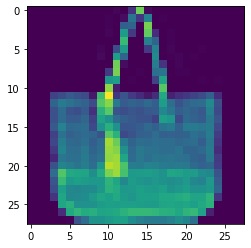

8


In [4]:
plt.imshow(train_imagesi[35,:,:])
plt.show()
print(train_labels[35])

In [5]:
train_labels[:100]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8], dtype=uint8)

In [6]:
train_images[202,150:160]

array([-0.5984252 , -0.62204724, -0.64566929, -0.56692913, -0.59055118,
       -0.62992126, -0.61417323, -0.61417323, -0.66929134, -0.58267717])

In [7]:
# Размер набора данных для обучения
train_images.shape

(60000, 784)

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

In [8]:
#Собираем сеть по слоям через .add()
model = Sequential(name='2_layer_model')
model.add(Dense(128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
model.add(Dense(10, activation='tanh')) 
# Скрытый слой 10 нейронов с активацией tanh
model.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

# Компилируем сеть с оптимизатором Adam (нам на данный момент интересно влияние количества нейронов), функцией потерь и метрикой:
model.compile(
  optimizer='adam', # оптимизатор
  loss=CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
)


In [9]:
model.summary()

Model: "2_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________


101 880 параметров в сети. Все будем обучать.

Как считать параметры слоя: (число входов нейрона +1)*число нейронов

Например, для 5 входов и 10 нейронов в слое - число настраиваемых параметров = (5+1)*10 = 60



In [10]:
# Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [11]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Посмотрим на реакции модели до обучения

In [12]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [13]:
y_pred = model.predict(test_images[:5,:])
y_pred[0,:].sum()

0.9999999

In [14]:
y_class = np.argmax(y_pred, axis=1)
print(y_class)

[4 4 4 8 4]


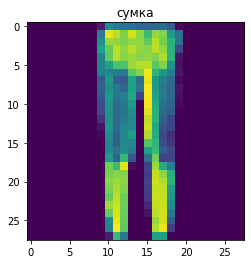

In [15]:
def encode_to_text(n):
    dict = {
        0: 'футболка',
        1: 'брюки',
        2: 'свитер',
        3: 'платье',
        4: 'куртка',
        5: 'сандалии',
        6: 'рубашка',
        7: 'кроссовки',
        8: 'сумка',
        9: 'ботинки',
            }
    return dict[n]
  
n = 3
plt.imshow(test_imagesi[n,:,:])
plt.title(encode_to_text(y_class[n]))
plt.show()

Сделаем цикл тренировки модели

In [16]:
# Train the model.
model.fit(  
  train_images[:,:],

  y_t[:,:],
  epochs=15,
  batch_size=32, validation_split=0.2
)


Epoch 1/15
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6514 - accuracy: 0.8007 - val_loss: 0.4837 - val_accuracy: 0.8399
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4400 - accuracy: 0.8486 - val_loss: 0.4283 - val_accuracy: 0.8491
Epoch 3/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3948 - accuracy: 0.8620 - val_loss: 0.4206 - val_accuracy: 0.8512
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3625 - accuracy: 0.8720 - val_loss: 0.3901 - val_accuracy: 0.8597
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3419 - accuracy: 0.8789 - val_loss: 0.4040 - val_accuracy: 0.8604
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3257 - accuracy: 0.8839 - val_loss: 0.3617 - val_accuracy: 0.8735
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3118 - accuracy: 0.8880 - val_loss: 0.3627 - val_accuracy

In [17]:
# Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
y_predict = np.argmax(predictions, axis=1)
print(y_predict)

# Check our predictions against the ground truths.
print(test_labels[:5])

313/313 [==============================] - 1s 4ms/step - loss: 0.3824 - accuracy: 0.8705
[9 2 1 1 6]
[9 2 1 1 6]


In [18]:
# Дополнительный цикл обучения
model.fit(
  train_images,
  y_t,
  epochs=3,
  batch_size=1024, validation_split=0.2, verbose=0
)

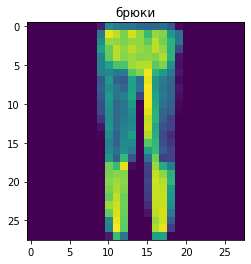

In [19]:
n = 3
plt.imshow(test_imagesi[n,:,:])
plt.title(encode_to_text(y_predict[n]))
plt.show()

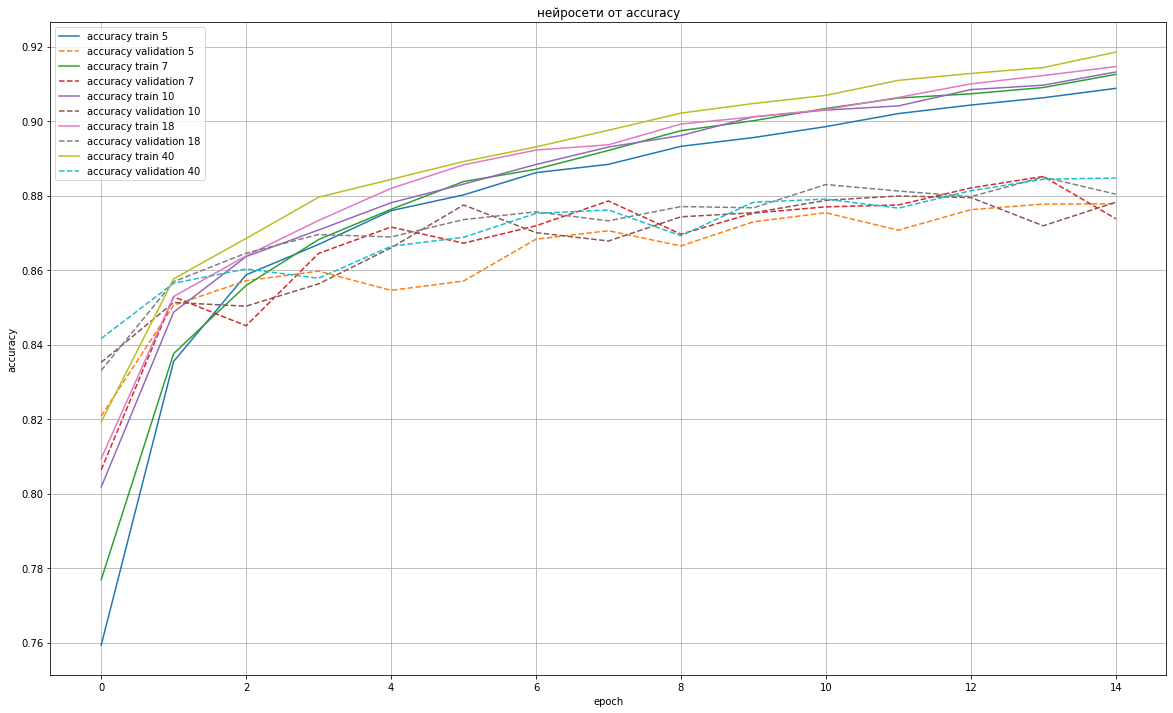

In [20]:
neuron_numb = [5, 7, 10, 18, 40]
plt.figure(figsize=(20,12))
for n in neuron_numb:
    model = Sequential(name='2_layer_model')
    model.add(Dense(128, activation='relu', input_shape=(784,)))  

    model.add(Dense(n, activation='tanh')) 

    model.add(Dense(10, activation='softmax')) 

    # Компилируем сеть с оптимизатором Adam (нам на данный момент интересно влияние количества нейронов), функцией потерь и метрикой:
    model.compile(
        optimizer='adam',
        loss=CategoricalCrossentropy(),
        metrics=['accuracy'],
    ) 
    model_history = model.fit(
        train_images[:,:],
        y_t[:,:],
        epochs=15,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    plt.plot(model_history.history['accuracy'], '-', label = f'accuracy train {n}')
    plt.plot(model_history.history['val_accuracy'], '--', label = f'accuracy validation {n}')
        
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


Вывод: качество нейронной сети не сильно зависит от числа нейронов при таком же числе слоев и при достаточном количестве эпох.


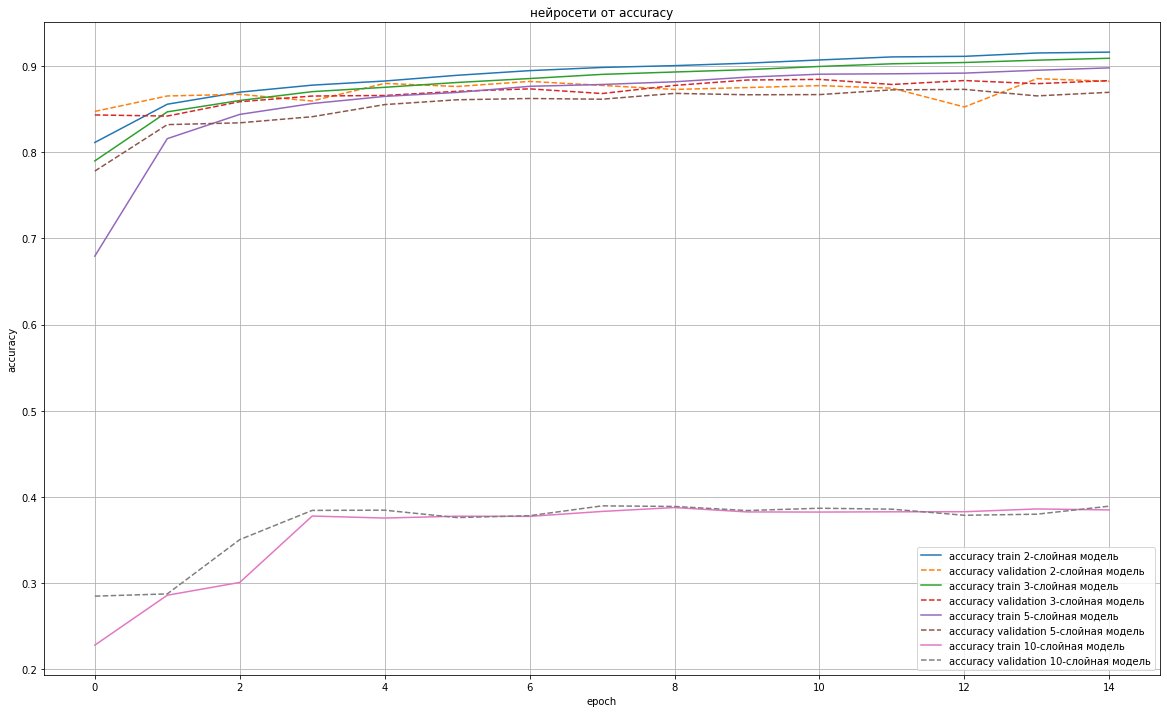

In [21]:
neuron_numb = 30
layers_numb = [2, 3, 5, 10]
plt.figure(figsize=(20,12))
for layers in layers_numb:
    model_l = Sequential(name=f'{layers}_layer_model')
    model_l.add(Dense(128, activation='relu', input_shape=(784,)))  

    for k in range(layers-1):
        model_l.add(Dense(neuron_numb / (layers-1), activation='tanh')) 

    model_l.add(Dense(10, activation='softmax'))
    
    if layers == 3:
        model_l.save_weights('model.l3') # сохраним для задания №2
#         print(model_l.summary())

    model_l.compile(
        optimizer='adam',
        loss=CategoricalCrossentropy(),
        metrics=['accuracy'],
    ) 
    model_l_history = model_l.fit(
        train_images[:,:],
        y_t[:,:],
        epochs=15,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    plt.plot(model_l_history.history['accuracy'], '-', label = f'accuracy train {layers}-слойная модель')
    plt.plot(model_l_history.history['val_accuracy'], '--', label = f'accuracy validation {layers}-слойная модель')
        
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Большое количество слоев отрицательно влияет на качество сети

2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.


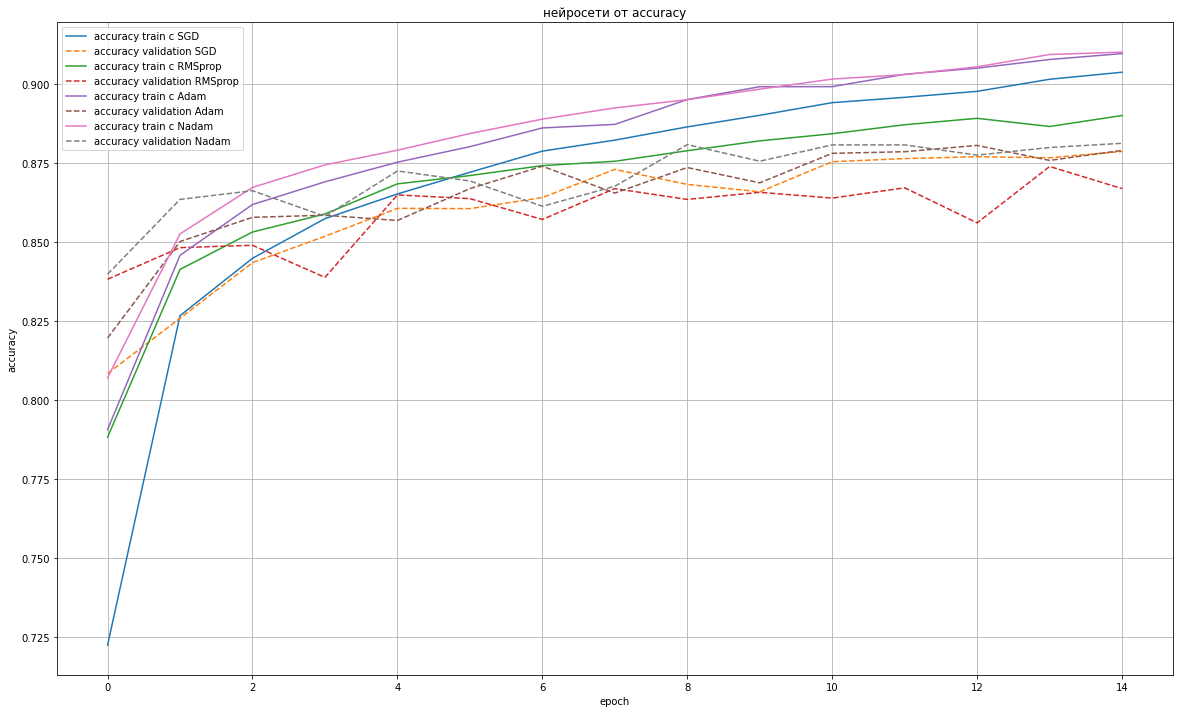

In [22]:
plt.figure(figsize=(20,12))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

for i_optim in [SGD(), RMSprop(), Adam(), Nadam()]:
  # создаем рабочую модель modeli куда будем загружать веса из предыдущего задания. Параметры сети - 3 слоя (2 скрытых по 15 нейронов)
    modeli = Sequential(name=f'{i_optim.get_config()["name"]}_layer_model')
    modeli.add(Dense(128, activation='relu', input_shape=(784,)))  

    for k in range(2):
        modeli.add(Dense(15, activation='tanh')) 

    modeli.add(Dense(10, activation='softmax'))
#     print(modeli.summary())
    
  # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.l3')

  # компилируем modeli с одним из оптимизаторов
    modeli.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )

    modeli_history = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )

    plt.plot(modeli_history.history['accuracy'], '-', label = f'accuracy train с {modeli.optimizer.get_config()["name"]}')
    plt.plot(modeli_history.history['val_accuracy'], '--', label = f'accuracy validation {modeli.optimizer.get_config()["name"]}')
     
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 


Выбор оптимизатора и количество нейронов не так сильно влияют на качество, в отличие от уменьшения количества слоев и дообучения.

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [23]:
neuron_numb = 20

model = Sequential(name='3_layer_model')
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(neuron_numb / 2, activation='tanh')) 
model.add(Dense(neuron_numb / 2, activation='tanh'))
model.add(Dense(10, activation='softmax')) 

model.compile(
  optimizer='nadam',
  loss=CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'],
) 

model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2, verbose=0
)

In [24]:
model.evaluate( 
  test_images,
  y_tt
)

predictions = model.predict(test_images)

y_predict = np.argmax(predictions, axis=1)
print(y_predict[:50])

print(test_labels[:50])

313/313 [==============================] - 1s 4ms/step - loss: 0.3673 - accuracy: 0.8754
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0 2 5 7 5 1 2 6 0 9 6 8 8 3 3 8 0 7
 5 7 9 0 1 6 9 6 7 2 1 2 6]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


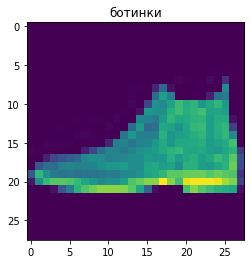

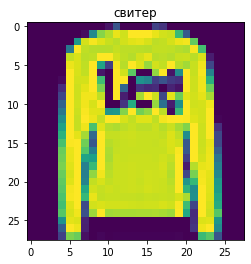

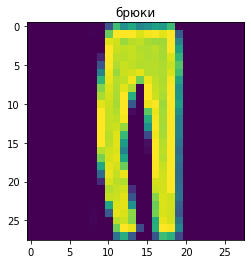

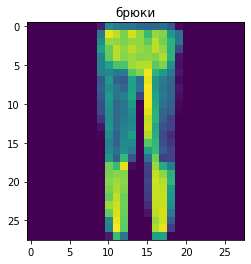

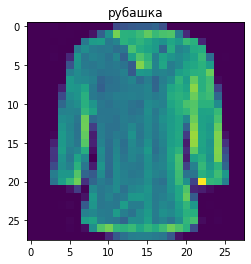

In [25]:
for n in range(5):
    plt.imshow(test_imagesi[n,:,:])
    plt.title(encode_to_text(y_predict[n]))
    plt.show()

In [26]:
cnf_matrix = confusion_matrix(test_labels, y_predict)

In [27]:
cnf_matrix

array([[852,   3,  23,   9,   2,   0, 102,   2,   6,   1],
       [  3, 973,   0,  18,   2,   0,   2,   0,   2,   0],
       [ 16,   3, 782,  12, 117,   0,  67,   0,   2,   1],
       [ 42,  11,  10, 857,  39,   0,  36,   1,   4,   0],
       [  0,   0,  77,  29, 851,   0,  39,   0,   4,   0],
       [  0,   1,   0,   0,   0, 945,   0,  38,   1,  15],
       [137,   1,  92,  27,  96,   0, 633,   0,  14,   0],
       [  0,   0,   0,   0,   0,  23,   0, 935,   0,  42],
       [  1,   3,   3,   5,   4,   6,   7,   6, 965,   0],
       [  0,   0,   0,   0,   0,   9,   1,  29,   0, 961]])

In [28]:
TP = np.diag(cnf_matrix)
TP

array([852, 973, 782, 857, 851, 945, 633, 935, 965, 961])

In [29]:
FP = np.sum(cnf_matrix, axis=0) - TP
FP

array([199,  22, 205, 100, 260,  38, 254,  76,  33,  59])

In [30]:
FN = np.sum(cnf_matrix, axis=1) - TP
FN

array([148,  27, 218, 143, 149,  55, 367,  65,  35,  39])

In [31]:
num_classes = 10
TN = []
for i in range(num_classes):
    temp = np.delete(cnf_matrix, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
TN

[8801, 8978, 8795, 8900, 8740, 8962, 8746, 8924, 8967, 8941]

In [32]:
for i in range(num_classes):
    print(TP[i] + FP[i] + FN[i] + TN[i])

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [33]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f = 2 * (precision * recall) / (precision + recall)

In [34]:
metrics = pd.DataFrame({'precision': precision, 'recall': recall, 'f1-score': f})

In [35]:
metrics

,precision,recall,f1-score
0,0.810657,0.852,0.830814
1,0.977889,0.973,0.975439
2,0.792300,0.782,0.787116
3,0.895507,0.857,0.875830
4,0.765977,0.851,0.806253
5,0.961343,0.945,0.953101
6,0.713641,0.633,0.670906
7,0.924827,0.935,0.929886
8,0.966934,0.965,0.965966
9,0.942157,0.961,0.951485


In [36]:
metrics.to_csv('metrics')

In [37]:
report = classification_report(test_labels, y_predict)
with open ('report.txt', 'w') as w:
    w.write(report)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.78      0.79      1000
           3       0.90      0.86      0.88      1000
           4       0.77      0.85      0.81      1000
           5       0.96      0.94      0.95      1000
           6       0.71      0.63      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



Метрики довольно высокие получились